In [247]:
from environment_modified import Environment, Action, State
import numpy as np 
from collections import defaultdict
from el_agent import ELAgent


import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Rectangle

from IPython.display import HTML

In [16]:
!ls

EL                            cliff_walking_sarsa.png
Untitled.ipynb                el_agent.py
__pycache__                   environment.py
cliff_walking.ipynb           environment_modified.py
cliff_walking_animation.ipynb q_learning_demo.ipynb
cliff_walking_q_learning.png  sarsa_demo.ipynb


In [29]:
grid = np.array([[0, 0, 0, 0, 0, 0], [0, None, 1, 0, 0, 0], [0, None, None, -1, 0, 0], [0, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
env = Environment(grid)

In [30]:
class QLearningAgentGridMap(ELAgent):

    def __init__(self, env, epsilon=0.1):
        super().__init__(epsilon)
        self.state_array = [[State(i, j) for j in range(env.grid.shape[1])] for i in range(env.grid.shape[0])]
        self.history = []

    #def __getitem__(self, index):
    def __getitem__(self, index):
        Q_index = self.state_array[index[0]][index[1]]
        return self.Q[Q_index]
        
    def reset(self):
        self.init_log()
        actions = env.actions
        self.Q = defaultdict(lambda: [0] * len(actions))
        
    def learn(self, env, episode_count=1000, gamma=0.9,
              learning_rate=0.1, render=False, report_interval=50):
        self.init_log() 
        #actions = list(range(env.action_space.n))
        #actions = list(env.actions)
        actions = env.actions
        self.Q = defaultdict(lambda: [0] * len(actions))
        for e in range(episode_count):
            course_history = []
            #print(self.Q)
            #print("Episode: {}".format(e))
            s = env.reset()
            course_history.append(s)
            done = False
            while not done:
                
                #print(self.Q)
                #print("s: {}".format(s))
                if render:
                    env.render()
                a = self.policy(s, actions)
                n_state, reward, done = env.step(actions[a])

                gain = reward + gamma * max(self.Q[n_state])
                estimated = self.Q[s][a]
                self.Q[s][a] += learning_rate * (gain - estimated)
                s = n_state
                #print("n_state: {}".format(n_state))
                course_history.append(s)
            else:
                self.log(reward)
            self.history.append(course_history)
            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

In [125]:
#grid = np.array([[0, 0, 0, 0, 0, 0], [0, 9, 1, 0, 0, 0], [0, 9, 9, -1, 0, 0], [0, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
grid = np.zeros((4, 12))
grid[3, 1:11] = -100
grid[3, 11] = 100
#grid = np.array([[0, 0, 0, 0, 0, 0], [0, -1, 1, 0, 0, 0], [0, -1, -1, -1, 0, 0], [0, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])

env = Environment(grid)
agent = QLearningAgentGridMap(env)


In [126]:
agent.learn(env, episode_count=500, render=False)


At Episode 50 average reward is -96.0 (+/-28.0).
At Episode 100 average reward is 44.0 (+/-89.8).
At Episode 150 average reward is 24.0 (+/-97.077).
At Episode 200 average reward is 68.0 (+/-73.321).
At Episode 250 average reward is 52.0 (+/-85.417).
At Episode 300 average reward is 28.0 (+/-96.0).
At Episode 350 average reward is 64.0 (+/-76.837).
At Episode 400 average reward is 36.0 (+/-93.295).
At Episode 450 average reward is 72.0 (+/-69.397).


In [127]:
agent[3, 0]

[-14.149439519903227,
 -8.842986530922488,
 4.167485479006269,
 -68.63760133118669]

In [128]:
agent.history[1]

[<State: [3, 0]>, <State: [3, 0]>, <State: [3, 1]>]

In [129]:
def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
    return circle

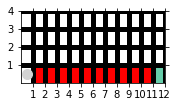

In [240]:
import matplotlib
from matplotlib.patches import Rectangle
#for cnt, (value, policy) in enumerate(pol_iter_palanner.plan()):
for cnt, _ in enumerate([0]):
    #print()
    #print("Iteration: " + str(cnt + 1))
    #print()
    #state_list = list(policy.keys())
    #print(len(state_list))
    fig = plt.figure(figsize=(2, 1))
    ax = fig.add_subplot(111)
    #print(policy)
    circle, = plt.plot([0.5], [0.5], marker='o', color='#d3d3d3', markersize=10)
    num_font_size = 10
    # 数字
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
                
            if(grid[i][j]>0):
                ax.add_patch(Rectangle((j, grid.shape[0]  - i - 1), 1, 1, fc='mediumaquamarine'))
                continue
                
            elif(grid[i][j]is None):
                ax.add_patch(Rectangle((j, grid.shape[0]  - i - 1), 1, 1, fc='silver'))
                continue

            elif(grid[i][j]<0):
                ax.add_patch(Rectangle((j, grid.shape[0]  - i - 1), 1, 1, fc='red'))
                continue
                
            #action_value_dict = policy[state_list[i*grid.shape[0] + j]]
            
            center_x = 0.45 + j
            center_y = grid.shape[0] - 0.5 - i
            
            action_value = agent[i, j]
            #print("action_value")
            #print(action_value)
            
            up = action_value[0]
            down = action_value[1]
            right = action_value[2]
            left = action_value[3]
            #plt.arrow(center_x, center_y + 0.2, 0.0, 0.15*up, width = 0.025*up, head_width=0.075*up, head_length=0.1*up, fc='k', ec='k')
            #plt.arrow(center_x, center_y - 0.2, 0.0, -0.15*down, width = 0.025*down, head_width=0.075*down, head_length=0.1*down, fc='k', ec='k')
            #plt.arrow(center_x + 0.2, center_y, 0.15*right, 0.0, width = 0.025*right, head_width=0.075*right, head_length=0.1*right, fc='k', ec='k')
            #plt.arrow(center_x - 0.2, center_y, -0.15*left, 0.0, width = 0.025*left, head_width=0.075*left, head_length=0.1*left, fc='k', ec='k')
            
            '''
            plt.text(center_x, center_y + 0.2,  str(np.round(up, 2)))
            plt.text(center_x, center_y - 0.2,  str(np.round(down, 2)))
            plt.text(center_x + 0.2, center_y, str(np.round(right, 2)))
            plt.text(center_x - 0.2, center_y, str(np.round(left, 2)))
            value_mean = sum(action_value) / len(action_value)
            ax.add_patch(Rectangle((j, grid.shape[0]  - i - 1), 1, 1,alpha=max(0, value_mean), fc='darkorange'))
            '''
            
            #plt.text(center_x, center_y, str(round(value[i][j], 2)), size=10, ha='center', va='center', color = 'k')
            
    ## 円
    #circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

    # 目盛りと枠の非表示
    plt.tick_params(axis='both', which='both', bottom='off', top= 'off',
        labelbottom='off', right='off', left='off', labelleft='off')
    
    plt.xlim(0, grid.shape[1])
    plt.ylim(0, grid.shape[0])

    plt.xticks(np.array(range(grid.shape[1])) + 1)
    plt.yticks(np.array(range(grid.shape[0])) + 1)

    plt.grid(color = 'k', linewidth = 5.0)
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.box('off')
    #plt.savefig("cliff_walking_q_learning.png")
    #plt.show()

In [241]:
from matplotlib import animation
from IPython.display import HTML
def animate(i):
    episode_number = episode_number_flattened[i]
    state = sample_episodes_flattened[i]
    #print("state")
    #print(state)
    #history_idx = episode_index_flattened[i]
    #state = history[history_idx]
    circle.set_data(state.column + 0.5, 3 - state.row + 0.5)
    center_x = 0.45 + state.column
    center_y = grid.shape[0] - 0.5 - state.row
    action_value = agent[state.row, state.column]
    value_mean = sum(action_value) / len(action_value)
    ax.add_patch(Rectangle((state.column, grid.shape[0]  - state.row - 1), 1, 1,alpha=max(0, value_mean), fc='darkorange'))
    return circle

In [242]:
first_episode_number = 0
last_episode_number = 500
episode_range = range(first_episode_number, last_episode_number)
sample_episodes = agent.history[first_episode_number:last_episode_number]

episode_number_list = [[episode_number]*len(sample_episodes[episode_number-first_episode_number]) for episode_number in episode_range]
episode_number_flattened = list(itertools.chain.from_iterable(episode_number_list))

episode_index_list = [list(range(len(sample_episodes[episode_number-first_episode_number]))) for episode_number in episode_range]
episode_index_flattened = list(itertools.chain.from_iterable(episode_index_list))

sample_episodes_flattened = list(itertools.chain.from_iterable(sample_episodes))

In [245]:

anim = animation.FuncAnimation(fig, animate, \
        frames=len(sample_episodes_flattened), interval=100, repeat=False)

In [246]:
HTML(anim.to_jshtml())

KeyboardInterrupt: 

In [ ]:
first_episode_number = 300
last_episode_number = 400
episode_range = range(first_episode_number, last_episode_number)
sample_episodes = agent.history[first_episode_number:last_episode_number]

episode_number_list = [[episode_number]*len(sample_episodes[episode_number-first_episode_number]) for episode_number in episode_range]
episode_number_flattened = list(itertools.chain.from_iterable(episode_number_list))

episode_index_list = [list(range(len(sample_episodes[episode_number-first_episode_number]))) for episode_number in episode_range]
episode_index_flattened = list(itertools.chain.from_iterable(episode_index_list))

sample_episodes_flattened = list(itertools.chain.from_iterable(sample_episodes))


In [151]:
for i in range(len(episode_number_list)):
    print(len(episode_number_list[i]), len(sample_episodes[i]))

33 33
28 28
23 23
30 30
43 43
24 24
36 36
46 46
21 21
39 39
23 23
55 55
31 31
32 32
31 31
39 39
32 32
32 32
36 36
33 33
6 6
38 38
35 35
40 40
5 5
31 31
30 30
43 43
56 56
26 26
38 38
38 38
37 37
33 33
48 48
3 3
8 8
37 37
33 33
30 30
23 23
25 25
40 40
34 34
30 30
29 29
15 15
34 34
26 26
26 26
63 63
34 34
22 22
44 44
30 30
33 33
8 8
27 27
38 38
25 25
40 40
67 67
29 29
29 29
26 26
27 27
42 42
31 31
34 34
29 29
39 39
26 26
38 38
9 9
30 30
4 4
32 32
8 8
35 35
28 28
27 27
9 9
2 2
33 33
5 5
25 25
29 29
42 42
61 61
46 46
44 44
4 4
32 32
28 28
36 36
27 27
27 27
14 14
21 21
33 33


In [153]:
import itertools

l_2d = [[0, 1], [2, 3]]

print(list(itertools.chain.from_iterable(episode_number_list)))

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306,

In [138]:
sample_episodes

[[<State: [3, 0]>,
  <State: [3, 0]>,
  <State: [3, 0]>,
  <State: [3, 0]>,
  <State: [3, 0]>,
  <State: [3, 0]>,
  <State: [3, 0]>,
  <State: [3, 0]>,
  <State: [3, 0]>,
  <State: [3, 0]>,
  <State: [2, 0]>,
  <State: [2, 1]>,
  <State: [2, 2]>,
  <State: [2, 3]>,
  <State: [2, 2]>,
  <State: [1, 2]>,
  <State: [0, 2]>,
  <State: [1, 2]>,
  <State: [1, 1]>,
  <State: [0, 1]>,
  <State: [0, 0]>,
  <State: [0, 1]>,
  <State: [0, 2]>,
  <State: [0, 3]>,
  <State: [1, 3]>,
  <State: [0, 3]>,
  <State: [0, 4]>,
  <State: [1, 4]>,
  <State: [2, 4]>,
  <State: [2, 5]>,
  <State: [1, 5]>,
  <State: [0, 5]>,
  <State: [0, 6]>,
  <State: [0, 7]>,
  <State: [0, 8]>,
  <State: [0, 9]>,
  <State: [0, 10]>,
  <State: [0, 10]>,
  <State: [1, 10]>,
  <State: [0, 10]>,
  <State: [0, 9]>,
  <State: [0, 10]>,
  <State: [0, 9]>,
  <State: [0, 9]>,
  <State: [0, 9]>,
  <State: [0, 9]>,
  <State: [0, 10]>,
  <State: [1, 10]>,
  <State: [1, 11]>,
  <State: [2, 11]>,
  <State: [2, 10]>,
  <State: [2, 11]>,
 

In [159]:
#sample_history = agent.history[480]
first_episode_number = 300
last_episode_number = 400
sample_episodes = agent.history
anim = animation.FuncAnimation(fig, animate, \
        frames=len(sample_history), interval=100, repeat=False)

In [160]:
HTML(anim.to_jshtml())

In [94]:
sample_history

[<State: [3, 0]>,
 <State: [3, 0]>,
 <State: [3, 0]>,
 <State: [3, 0]>,
 <State: [3, 1]>]

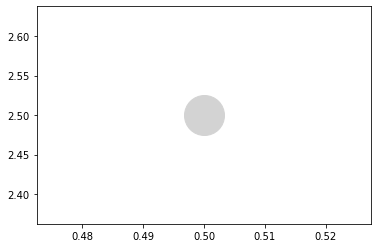

In [9]:
circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)


In [51]:
class SARSAAgent(ELAgent):

    def __init__(self, env, epsilon=0.1):
        super().__init__(epsilon)
        self.state_array = [[State(i, j) for j in range(env.grid.shape[1])] for i in range(env.grid.shape[0])]

    #def __getitem__(self, index):
    def __getitem__(self, index):
        Q_index = self.state_array[index[0]][index[1]]
        return self.Q[Q_index]

    def learn(self, env, episode_count=1000, gamma=0.9,
              learning_rate=0.5, render=False, report_interval=50):
        self.init_log()
        #actions = list(range(env.action_space.n))
        actions = env.actions
        self.Q = defaultdict(lambda: [0] * len(actions))
        for e in range(episode_count):
            s = env.reset()
            done = False
            a = self.policy(s, actions)
            while not done:
                if render:
                    env.render()
                #n_state, reward, done, info = env.step(a)
                n_state, reward, done = env.step(actions[a])


                n_action = self.policy(n_state, actions)  # On-policy
                gain = reward + gamma * self.Q[n_state][n_action]
                estimated = self.Q[s][a]
                self.Q[s][a] += learning_rate * (gain - estimated)
                s = n_state
                a = n_action
            else:
                self.log(reward)

            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

In [52]:
agent = SARSAAgent(env)
agent.learn(env, episode_count=500, render=False)


At Episode 50 average reward is -68.0 (+/-73.321).
At Episode 100 average reward is 8.0 (+/-99.679).
At Episode 150 average reward is 40.0 (+/-91.652).
At Episode 200 average reward is 52.0 (+/-85.417).
At Episode 250 average reward is 40.0 (+/-91.652).
At Episode 300 average reward is 36.0 (+/-93.295).
At Episode 350 average reward is 52.0 (+/-85.417).
At Episode 400 average reward is 36.0 (+/-93.295).
At Episode 450 average reward is 24.0 (+/-97.077).


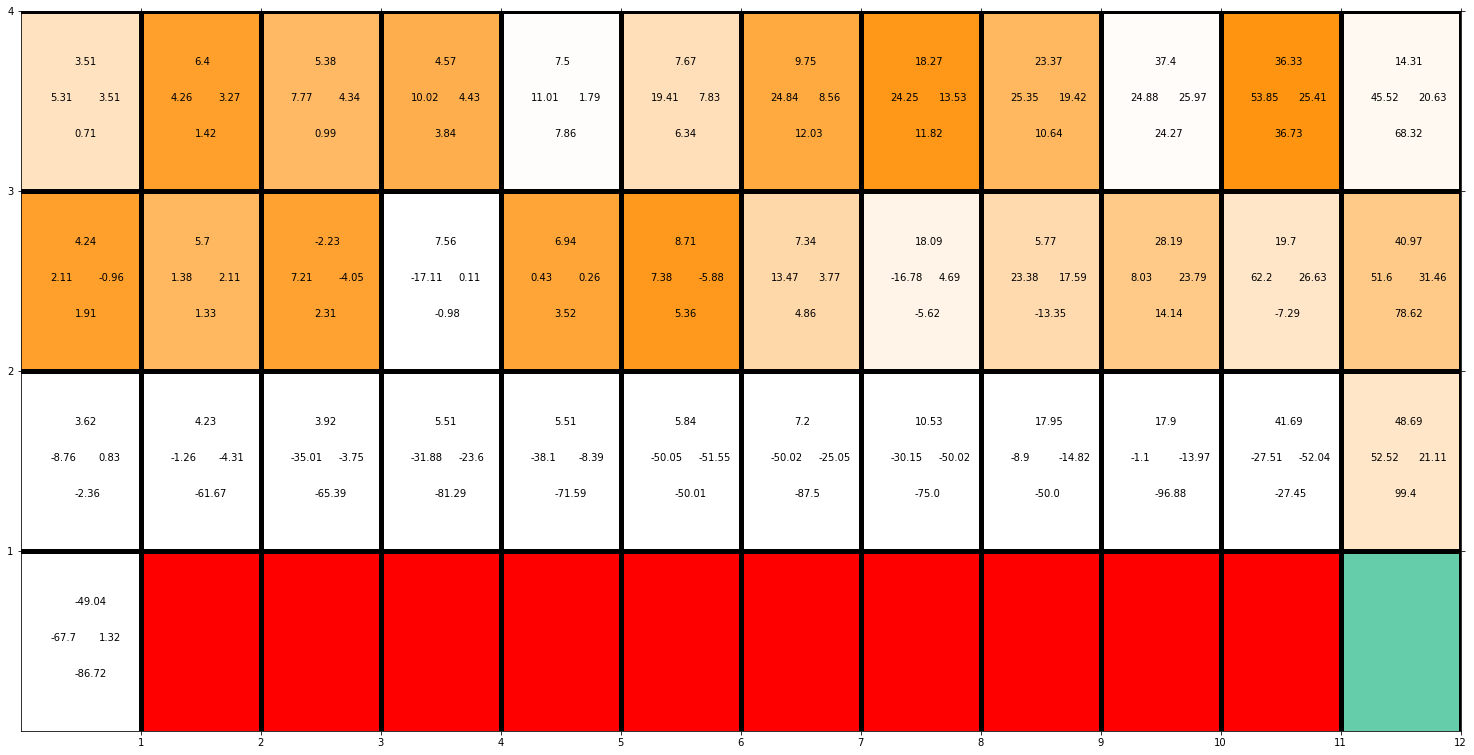

In [53]:
for cnt, _ in enumerate([0]):
    #print()
    #print("Iteration: " + str(cnt + 1))
    #print()
    #state_list = list(policy.keys())
    #print(len(state_list))
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    #print(policy)
    num_font_size = 10
    # 数字
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
                
            if(grid[i][j]>0):
                ax.add_patch(Rectangle((j, grid.shape[0]  - i - 1), 1, 1, fc='mediumaquamarine'))
                continue
                
            elif(grid[i][j]is None):
                ax.add_patch(Rectangle((j, grid.shape[0]  - i - 1), 1, 1, fc='silver'))
                continue

            elif(grid[i][j]<0):
                ax.add_patch(Rectangle((j, grid.shape[0]  - i - 1), 1, 1, fc='red'))
                continue
                
            #action_value_dict = policy[state_list[i*grid.shape[0] + j]]
            
            center_x = 0.45 + j
            center_y = grid.shape[0] - 0.5 - i
            
            action_value = agent[i, j]
            #print("action_value")
            #print(action_value)
            
            up = action_value[0]
            down = action_value[1]
            right = action_value[2]
            left = action_value[3]
            
            #plt.arrow(center_x, center_y + 0.2, 0.0, 0.15*up, width = 0.025*up, head_width=0.075*up, head_length=0.1*up, fc='k', ec='k')
            #plt.arrow(center_x, center_y - 0.2, 0.0, -0.15*down, width = 0.025*down, head_width=0.075*down, head_length=0.1*down, fc='k', ec='k')
            #plt.arrow(center_x + 0.2, center_y, 0.15*right, 0.0, width = 0.025*right, head_width=0.075*right, head_length=0.1*right, fc='k', ec='k')
            #plt.arrow(center_x - 0.2, center_y, -0.15*left, 0.0, width = 0.025*left, head_width=0.075*left, head_length=0.1*left, fc='k', ec='k')
            
            plt.text(center_x, center_y + 0.2,  str(np.round(up, 2)))
            plt.text(center_x, center_y - 0.2,  str(np.round(down, 2)))
            plt.text(center_x + 0.2, center_y, str(np.round(right, 2)))
            plt.text(center_x - 0.2, center_y, str(np.round(left, 2)))
            value_mean = sum(action_value) / len(action_value)
            ax.add_patch(Rectangle((j, grid.shape[0]  - i - 1), 1, 1,alpha=max(0, value_mean), fc='darkorange'))
            
            
            
            #plt.text(center_x, center_y, str(round(value[i][j], 2)), size=10, ha='center', va='center', color = 'k')
            
    ## 円
    #circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

    # 目盛りと枠の非表示
    plt.tick_params(axis='both', which='both', bottom='off', top= 'off',
        labelbottom='off', right='off', left='off', labelleft='off')
    
    plt.xlim(0, grid.shape[1])
    plt.ylim(0, grid.shape[0])

    plt.xticks(np.array(range(grid.shape[1])) + 1)
    plt.yticks(np.array(range(grid.shape[0])) + 1)

    plt.grid(color = 'k', linewidth = 5.0)
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.box('off')
    plt.savefig("cliff_walking_sarsa.png")
    plt.show()

In [ ]:
class Actor(ELAgent):

    def __init__(self, env):
        super().__init__(epsilon=-1)
        nrow = env.observation_space.n
        ncol = env.action_space.n
        self.actions = list(range(env.action_space.n))
        self.Q = np.random.uniform(0, 1, nrow * ncol).reshape((nrow, ncol))

    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    def policy(self, s):
        a = np.random.choice(self.actions, 1,
                             p=self.softmax(self.Q[s]))
        return a[0]


class Critic():

    def __init__(self, env):
        states = env.observation_space.n
        self.V = np.zeros(states)


class ActorCritic():

    def __init__(self, actor_class, critic_class):
        self.actor_class = actor_class
        self.critic_class = critic_class

    def train(self, env, episode_count=1000, gamma=0.9,
              learning_rate=0.1, render=False, report_interval=50):
        actor = self.actor_class(env)
        critic = self.critic_class(env)

        actor.init_log()
        for e in range(episode_count):
            s = env.reset()
            done = False
            while not done:
                if render:
                    env.render()
                a = actor.policy(s)
                n_state, reward, done, info = env.step(a)

                gain = reward + gamma * critic.V[n_state]
                estimated = critic.V[s]
                td = gain - estimated
                actor.Q[s][a] += learning_rate * td
                critic.V[s] += learning_rate * td
                s = n_state

            else:
                actor.log(reward)

            if e != 0 and e % report_interval == 0:
                actor.show_reward_log(episode=e)

        return actor, critic